In [1]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading all the input files
data1 = pd.read_csv('Dataset/assessments.csv')
data2 = pd.read_csv('Dataset/courses.csv')
data3 = pd.read_csv('Dataset/studentAssessment.csv')
data4 = pd.read_csv('Dataset/studentInfo.csv')
data5 = pd.read_csv('Dataset/studentRegistration.csv')
data6 = pd.read_csv('Dataset/studentVle.csv')
data7 = pd.read_csv('Dataset/vle.csv')

In [101]:
#reading the merged file
df = pd.read_parquet('merged_paraquet',engine='fastparquet')

In [39]:
df.shape

(14615726, 23)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14615726 entries, 0 to 14615725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   code_module           object 
 1   code_presentation     object 
 2   id_student            int64  
 3   gender                object 
 4   region                object 
 5   highest_education     object 
 6   imd_band              object 
 7   age_band              object 
 8   num_of_prev_attempts  int64  
 9   studied_credits       int64  
 10  disability            object 
 11  final_result          object 
 12  date_registration     float64
 13  date_unregistration   float64
 14  date                  int64  
 15  sum_click             int64  
 16  id_assessment         int64  
 17  assessment_type       object 
 18  date_assessment       float64
 19  weight                float64
 20  date_submitted        int64  
 21  is_banked             int64  
 22  score                 float64
dtypes: fl

In [24]:
#looking for null values
df.isnull().sum()

code_module                    0
code_presentation              0
gender                         0
region                         0
highest_education              0
imd_band                  838072
age_band                       0
num_of_prev_attempts           0
studied_credits                0
disability                     0
final_result                   0
date_registration            159
date_unregistration     14061472
date                           0
sum_click                      0
id_assessment                  0
assessment_type                0
date_assessment           266242
weight                         0
date_submitted                 0
is_banked                      0
score                       7225
dtype: int64

In [103]:
#filling null values
df['imd_band'].fillna(df['imd_band'].mode()[0], inplace=True)
df['date_assessment'] = df.groupby(['id_student'])['date_assessment'].ffill()
df['score'].fillna(df['score'].mean(),inplace=True)

In [104]:
#for registration columns
df['date_registration'] = df.groupby(['id_student'])['date_registration'].ffill()
df['date_registration'] = df.groupby(['id_student'])['date_registration'].bfill()
df = df.dropna(subset=['date_registration'])

In [105]:
#df['date_unregistration']
df['date_unregistration'].fillna(0,inplace=True)

In [106]:
#verifying no null values are left
df.isnull().sum()

code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
date_registration       0
date_unregistration     0
date                    0
sum_click               0
id_assessment           0
assessment_type         0
date_assessment         0
weight                  0
date_submitted          0
is_banked               0
score                   0
dtype: int64

In [99]:
#verifying the number of rows
df.shape

(14615722, 22)

In [109]:
#dropping student id because it's not needed for building the model
df.drop('id_student',
  axis='columns', inplace=True)

In [110]:
#geeting a list of numeric columns
numeric = df.select_dtypes(include=np.number).columns.tolist()

In [111]:
#finding max and min values for each numeric columns
for i in numeric:
    print("----",i,"----")
    print("Max",df[i].max())
    print("Min",df[i].min())

---- num_of_prev_attempts ----
Max 6
Min 0
---- studied_credits ----
Max 630
Min 30
---- date_registration ----
Max 124.0
Min -311.0
---- date_unregistration ----
Max 444.0
Min -196.0
---- date ----
Max 269
Min -25
---- sum_click ----
Max 6988
Min 1
---- id_assessment ----
Max 37443
Min 1752
---- date_assessment ----
Max 261.0
Min 12.0
---- weight ----
Max 100.0
Min 0.0
---- date_submitted ----
Max 608
Min -11
---- is_banked ----
Max 1
Min 0
---- score ----
Max 100.0
Min 0.0


In [112]:
#removind id_assessment because it crosses 16-bit threshold
numeric.remove('id_assessment')
numeric

['num_of_prev_attempts',
 'studied_credits',
 'date_registration',
 'date_unregistration',
 'date',
 'sum_click',
 'date_assessment',
 'weight',
 'date_submitted',
 'is_banked',
 'score']

In [113]:
#converting to 16-bit integer type
for i in numeric:
    #print(i)
    df[i] = df[i].astype('int16')

num_of_prev_attempts
studied_credits
date_registration
date_unregistration
date
sum_click
date_assessment
weight
date_submitted
is_banked
score


In [114]:
#converting to 32-bit integer
df['id_assessment'] = df['id_assessment'].astype('int32')

In [115]:
#obtaining all the object datatype columns
obj = df.select_dtypes(include=object).columns.tolist()
obj

['code_module',
 'code_presentation',
 'gender',
 'region',
 'highest_education',
 'imd_band',
 'age_band',
 'disability',
 'final_result',
 'assessment_type']

In [116]:
#convertiing object to categorical
for i in obj:
    df[i] = df[i].astype('category')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14615722 entries, 0 to 14615725
Data columns (total 22 columns):
 #   Column                Dtype   
---  ------                -----   
 0   code_module           category
 1   code_presentation     category
 2   gender                category
 3   region                category
 4   highest_education     category
 5   imd_band              category
 6   age_band              category
 7   num_of_prev_attempts  int16   
 8   studied_credits       int16   
 9   disability            category
 10  final_result          category
 11  date_registration     int16   
 12  date_unregistration   int16   
 13  date                  int16   
 14  sum_click             int16   
 15  id_assessment         int32   
 16  assessment_type       category
 17  date_assessment       int16   
 18  weight                int16   
 19  date_submitted        int16   
 20  is_banked             int16   
 21  score                 int16   
dtypes: category(10),

In [64]:
df.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,date_unregistration,date,sum_click,id_assessment,assessment_type,date_assessment,weight,date_submitted,is_banked,score
0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0,-5,98,1752,TMA,19,10,18,0,78
1,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0,-5,98,1753,TMA,54,20,53,0,85
2,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0,-5,98,1754,TMA,117,20,115,0,80
3,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0,-5,98,1755,TMA,166,20,164,0,85
4,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,...,0,-5,98,1756,TMA,215,30,212,0,82


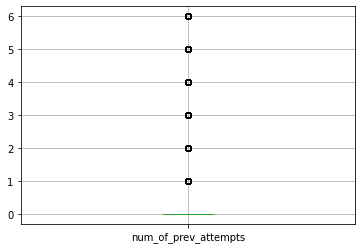

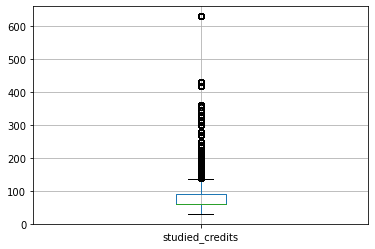

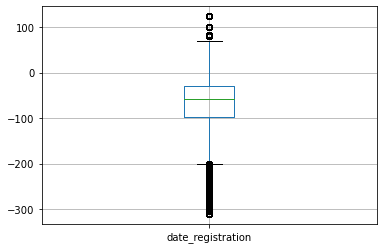

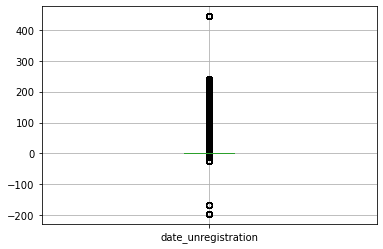

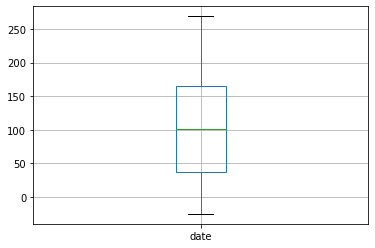

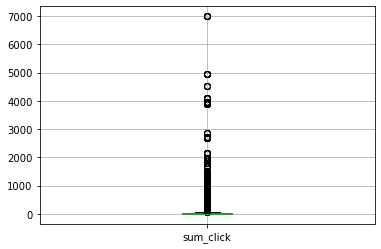

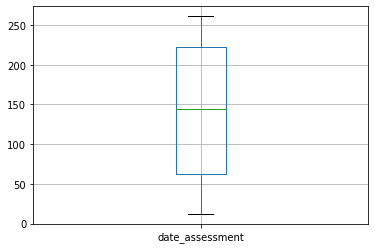

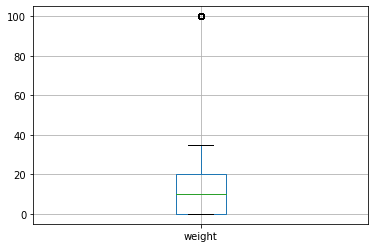

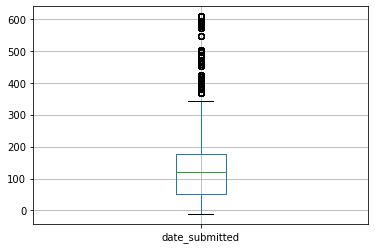

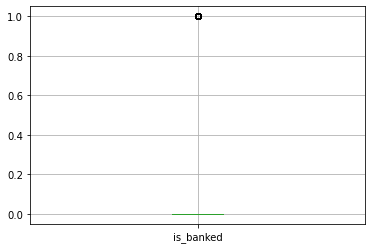

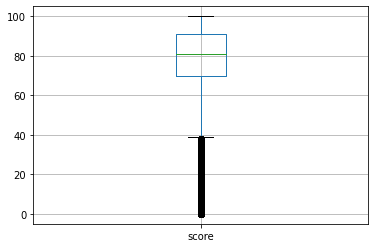

In [119]:
#boxplots of all the numeric columns
for column in numeric:
    plt.figure()
    df.boxplot([column])

In [120]:
#another dataframe to load all the values to remove a few rows beased on date_unregistered column
df_unregister = pd.DataFrame()
cols = ['date_unregistration','code_module','code_presentation']
for i in cols:
    df_unregister[i]=df[i]

In [124]:
#merging code_info and df_unregister
df_unregister = pd.merge(df_unregister,data2, on=['code_module','code_presentation'],how='inner')

In [125]:
df_unregister.head()

,date_unregistration,code_module,code_presentation,module_presentation_length
0,0,AAA,2013J,268
1,0,AAA,2013J,268
2,0,AAA,2013J,268
3,0,AAA,2013J,268
4,0,AAA,2013J,268


In [126]:
#obtaing the indices of the rows with date_unreg>=module_presentation length
ind = df_unregister[df_unregister['date_unregistration']>=df_unregister['module_presentation_length']].index.tolist()
#ind

[10400713,
 10400714,
 10400715,
 10400716,
 10400717,
 10400718,
 10400719,
 10400720,
 10400721,
 10400722,
 10400723,
 10400724,
 10400725,
 10400726,
 10400727,
 10400728,
 10400729,
 10400730,
 10400731,
 10400732,
 10400733,
 10400734,
 10400735,
 10400736,
 10400737,
 10400738,
 10400739,
 10400740,
 10400741,
 10400742,
 10400743,
 10400744,
 10400745,
 10400746,
 10400747,
 10400748,
 10400749,
 10400750,
 10400751,
 10400752,
 10400753,
 10400754,
 10400755,
 10400756,
 10400757,
 10400758,
 10400759,
 10400760,
 10400761,
 10400762,
 10400763,
 10400764,
 10400765,
 10400766,
 10400767,
 10400768,
 10400769,
 10400770,
 10400771,
 10400772,
 10400773,
 10400774,
 10400775,
 10400776,
 10400777,
 10400778,
 10400779,
 10400780,
 10400781,
 10400782,
 10400783,
 10400784,
 10400785,
 10400786,
 10400787,
 10400788,
 10400789,
 10400790,
 10400791,
 10400792,
 10400793,
 10400794,
 10400795,
 10400796,
 10400797,
 10400798,
 10400799,
 10400800,
 10400801,
 10400802,
 10400803,

In [127]:
#dropping all the obtained rows
df.drop(ind, axis='rows',inplace = True)

In [128]:
df.shape

(14615512, 22)

In [129]:
#converting the obtained data to an intermediate file
df.to_parquet('intermediate_parquet',index=False)